In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor']='white'
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from datetime import date

In [2]:
Customer = pd.read_excel('Case Study - Customer.xlsx')

In [3]:
Product = pd.read_excel('Case Study - Product.xlsx')

In [4]:
Store = pd.read_excel('Case Study - Store.xlsx')

In [5]:
Transaction = pd.read_excel('Case Study - Transaction.xlsx')

## Melakukan Clustering

- membuat segment customer yang digunakan untuk team marketing untuk memberikan personalized promotion dan sales treatment

In [6]:
Customer.sample(5)

,CustomerID,Age,Gender,Marital Status,Income
436,437,33,1,Married,3.49
252,253,37,0,Married,4.32
411,412,18,1,Single,0.00
116,117,45,1,Married,12.55
271,272,60,0,Married,4.05


In [7]:
Cust_Num = Customer.select_dtypes(include = 'number')
Cust_Cat = Customer.select_dtypes(exclude = 'number')
print(Cust_Num.columns)
print(Cust_Cat.columns)

Index(['CustomerID', 'Age', 'Gender', 'Income'], dtype='object')
Index(['Marital Status'], dtype='object')


In [8]:
Product.sample(5)

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
2,P3,Crackers,7500
4,P5,Thai Tea,4200
6,P7,Coffee Candy,9400
3,P4,Potato Chip,12000


In [9]:
Prod_Num = Product.select_dtypes(include = 'number')
Prod_Cat = Product.select_dtypes(exclude = 'number')
print(Prod_Num.columns)
print(Prod_Cat.columns)

Index(['Price'], dtype='object')
Index(['ProductID', 'Product Name'], dtype='object')


In [10]:
Store.sample(5)

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
13,14,Priangan,Priangan,Modern Trade,-5.450000,105.266670
7,8,Sinar Harapan,Harapan Baru,General Trade,5.548290,95.323753
1,2,Prima Kelapa Dua,Prima,Modern Trade,-6.914864,107.608238
0,1,Prima Tendean,Prima,Modern Trade,-6.200000,106.816666
5,6,Lingga,Lingga,Modern Trade,-5.135399,119.423790


In [11]:
Transaction.sample(5)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
3609,TR71882,399,2022-09-19,P5,4200,2,8400,2
636,TR82838,101,2022-02-15,P10,15000,4,60000,9
3276,TR74579,131,2022-08-25,P5,4200,3,12600,9
1264,TR63415,57,2022-03-30,P5,4200,3,12600,7
2358,TR14319,283,2022-06-19,P9,10000,3,30000,14


# Cleaning Data & PreProcesing

### Customer

In [13]:
Customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      447 non-null    int64  
 1   Age             447 non-null    int64  
 2   Gender          447 non-null    int64  
 3   Marital Status  444 non-null    object 
 4   Income          447 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 17.6+ KB


In [14]:
#Merubah tipe data
Customer['Income'] = Customer['Income'].replace('[,]','.',regex=True).astype('float')

In [15]:
Customer.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [16]:
#Imputasi nilai null
Customer['Marital Status'] = Customer['Marital Status'].fillna(Customer['Marital Status'].mode()[0])

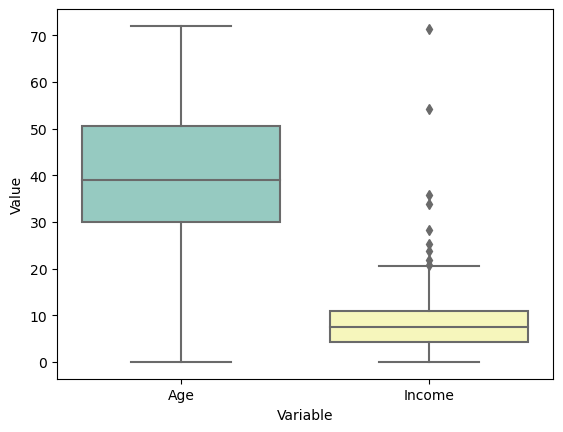

In [17]:
#Customer boxplot
sns.boxplot(data=Customer[['Age', 'Income']], orient='vertical', palette='Set3')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

### Product

In [18]:
Product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


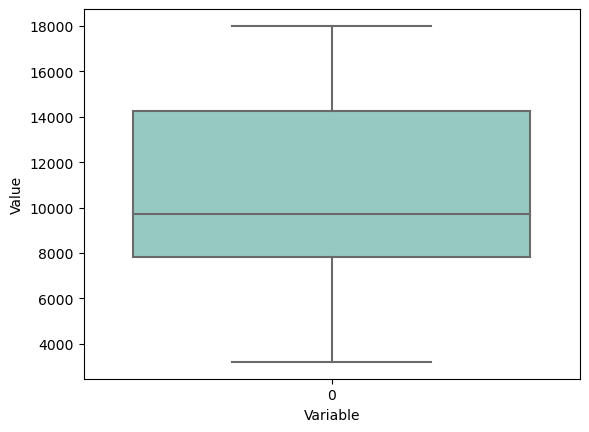

In [19]:
#Product boxplot
sns.boxplot(data=Product['Price'], orient='vertical', palette='Set3')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

### Store

In [20]:
Store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StoreID     14 non-null     int64  
 1   StoreName   14 non-null     object 
 2   GroupStore  14 non-null     object 
 3   Type        14 non-null     object 
 4   Latitude    14 non-null     float64
 5   Longitude   14 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 800.0+ bytes


In [21]:
Store['Latitude'] =Store['Latitude'].replace('[,]','.',regex=True).astype('float')
Store['Longitude'] =Store['Longitude'].replace('[,]','.',regex=True).astype('float')

### Transaction

In [25]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


In [26]:
Transaction['Date'] = pd.to_datetime(Transaction['Date'])

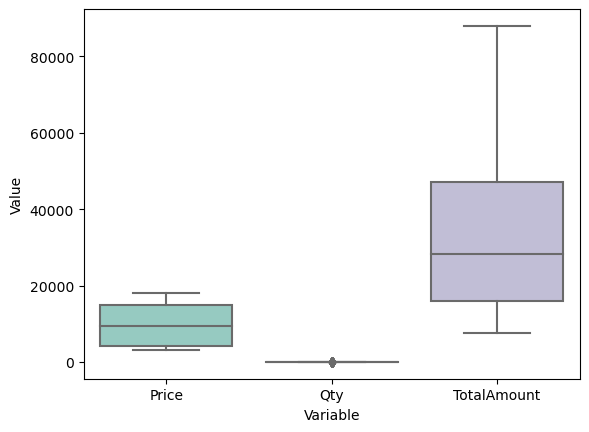

In [23]:
#Transaction boxplot
sns.boxplot(data=Transaction[['Price', 'Qty', 'TotalAmount']], orient='vertical', palette='Set3')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

## Merge All Data

In [27]:
all_data = Transaction.merge(Customer, on='CustomerID').merge(Product, on='ProductID').merge(Store, on='StoreID')
all_data.tail()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
5015,TR69555,221,2022-08-01,P4,12000,3,36000,4,23,1,Single,7.50,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5016,TR21587,425,2022-10-17,P4,12000,1,12000,4,58,1,Married,7.22,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5017,TR51183,409,2022-07-19,P4,12000,1,12000,4,47,0,Married,28.23,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5018,TR14963,374,2022-12-16,P4,12000,5,60000,4,32,0,Single,5.40,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5019,TR40750,271,2022-11-30,P4,12000,3,36000,4,29,0,Married,4.74,Potato Chip,12000,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [28]:
all_data = all_data.drop(columns = 'Price_y')

In [29]:
all_data.to_excel('all_data.xlsx', index=False)

#### Create new data for clustering (CustomerID, TransactionCount, TotalQty, TotalAmount)

In [31]:
# Grouping berdasarkan CustomerID dan melakukan aggregasi
agg_data = all_data.groupby('CustomerID').agg({
    'TransactionID': 'count', 
    'Qty': 'sum',  
    'TotalAmount': 'sum'  
}).reset_index()

# Mengganti nama kolom
agg_data.columns = ['CustomerID', 'TransactionCount', 'TotalQty', 'TotalAmount']

In [35]:
agg_data = agg_data.drop(columns = 'CustomerID')

In [36]:
agg_data.tail(5)

,TransactionCount,TotalQty,TotalAmount
442,16,59,485100
443,18,62,577700
444,18,68,587200
445,11,42,423300
446,13,42,439300


#### Scalling

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
col_name = list(agg_data.columns)

ss = StandardScaler()
data_std = ss.fit_transform(agg_data)
data_std = pd.DataFrame(data_std, columns=col_name)
data_std.sample(10)

,TransactionCount,TotalQty,TotalAmount
194,-0.071082,0.319355,0.200713
82,-0.071082,0.633268,0.170993
329,-0.688048,0.083921,-0.105324
23,0.545884,0.083921,0.116372
98,-0.688048,-0.622383,-0.370395
42,0.545884,1.261093,1.419238
351,0.237401,0.397833,-0.174403
173,-0.071082,0.554790,0.603139
47,-0.379565,0.319355,-0.163158
420,-0.379565,-1.014773,-0.563978


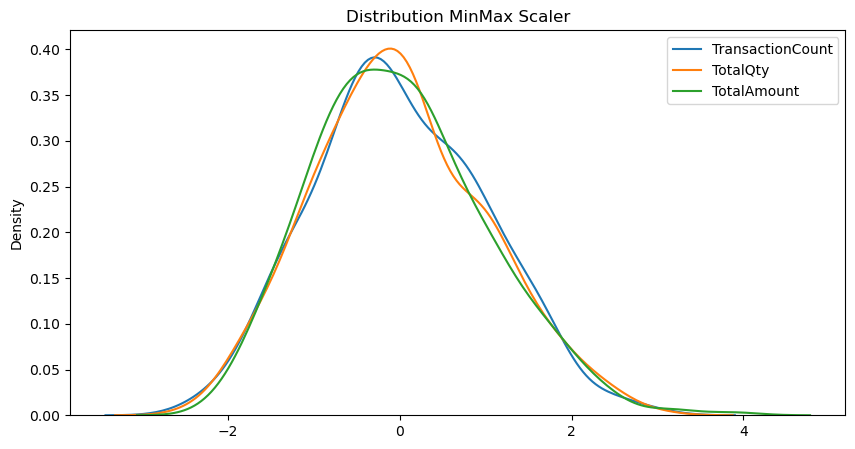

In [38]:
plt.figure(figsize=(10, 5))
plt.title('Distribution MinMax Scaler')
sns.kdeplot(data_std['TransactionCount'], label = 'TransactionCount')
sns.kdeplot(data_std['TotalQty'], label = 'TotalQty')
sns.kdeplot(data_std['TotalAmount'], label = 'TotalAmount')
plt.xlabel(None)
plt.legend()
plt.show()

## Modeling and Evaluation

#### Inertia

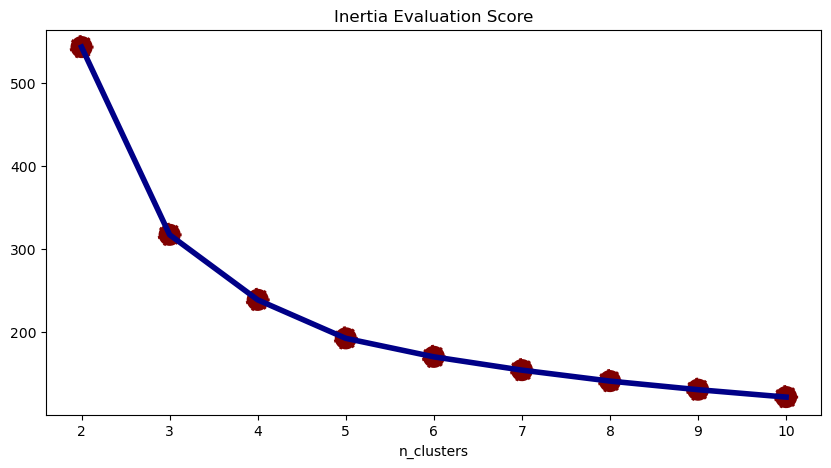

In [39]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data_std)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.title('Inertia Evaluation Score')
sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')
plt.xlabel('n_clusters')
plt.show()

#### Silhoutte

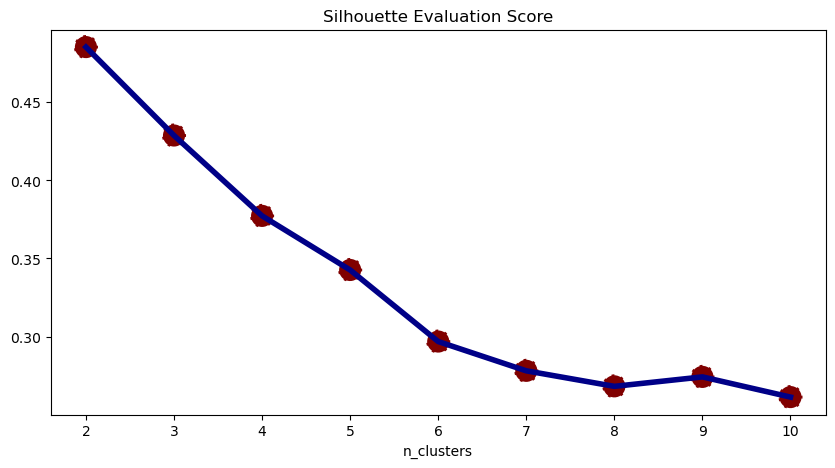

In [40]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(data_std)
    preds = kmeans.predict(data_std)
    score_euclidean = silhouette_score(data_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

fig, ax = plt.subplots(figsize=(10, 5))
plt.title('Silhouette Evaluation Score')
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='#800000',  linestyle='--')
plt.xlabel('n_clusters')
plt.show()

In [41]:
df_std_cluster = data_std.copy()
df_cluster = agg_data.copy()

kmeans = KMeans(n_clusters=4, random_state=0).fit(data_std)
df_std_cluster['clusters'] = kmeans.labels_
df_cluster['clusters'] = kmeans.labels_

In [42]:
df_cluster.sample(5)

,TransactionCount,TotalQty,TotalAmount,clusters
6,17,57,498800,3
322,8,34,214800,0
112,8,30,206400,0
242,13,37,439400,1
146,10,42,393700,2


### PCA

In [43]:
from sklearn.decomposition import PCA 

In [44]:
pca = PCA(n_components=2)

pca.fit(data_std)
pcs = pca.transform(data_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca['clusters'] = df_cluster['clusters']
df_pca.sample(10)

,PC 1,PC 2,clusters
131,0.451295,-0.450577,1
436,-1.985734,-0.182085,0
430,0.257664,0.464814,2
119,1.553268,-0.108222,1
264,-2.265339,0.222951,0
98,-0.969939,-0.197990,2
168,0.200125,0.180372,2
315,-1.592852,0.272443,0
78,-2.966398,0.063787,0
343,-2.089777,0.307854,0


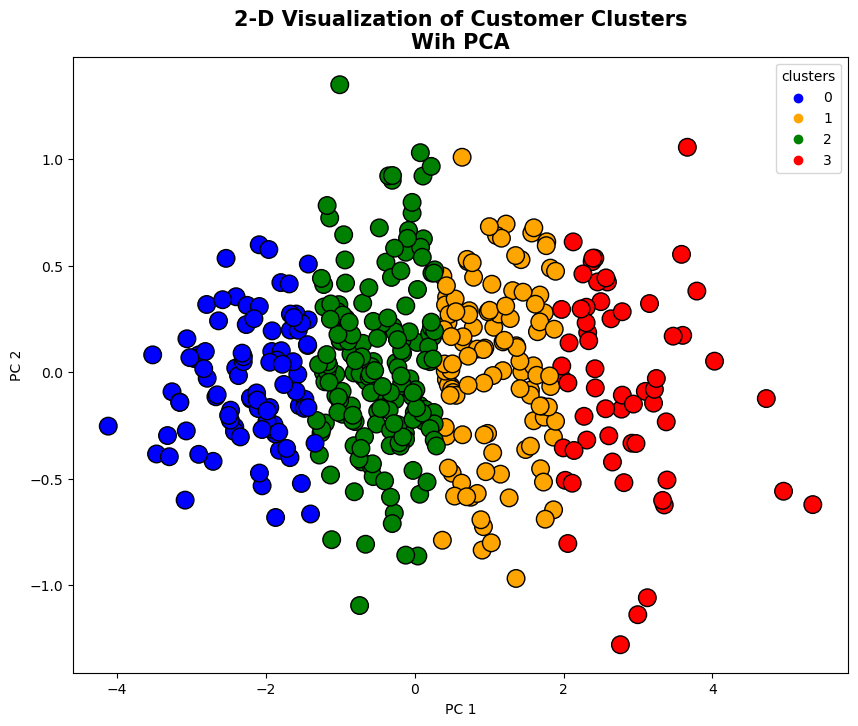

In [45]:
fig, ax = plt.subplots(figsize=(10,8))
plt.title("2-D Visualization of Customer Clusters\nWih PCA", fontsize=15, weight='bold')
sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    edgecolor='black',
    #linestyle='--',
    data=df_pca,
    palette=['blue','orange','green','red'],
    s=160,
    ax=ax
);

<Figure size 600x600 with 0 Axes>

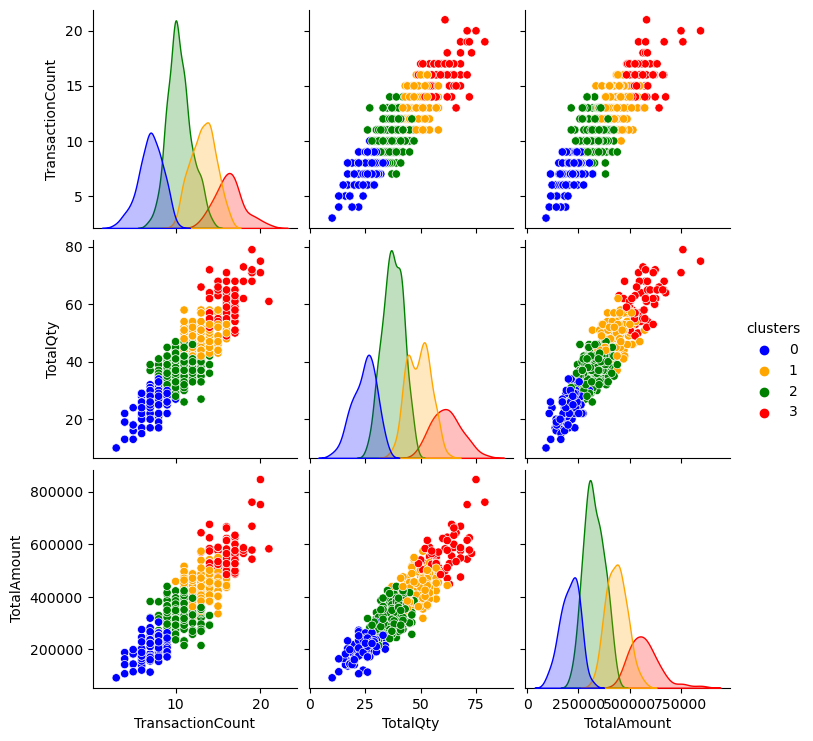

In [46]:
plt.figure(figsize=(6,6))
sns.pairplot(data=df_cluster,hue='clusters',palette= ['blue','orange','green','red'])
plt.show()

In [48]:
df_cluster['CustomerID'] = all_data['CustomerID']
df_cluster_x = df_cluster.groupby('clusters').agg({'CustomerID':'count','TransactionCount':'mean','TotalQty':'mean','TotalAmount':'mean'})
df_cluster_x.sort_values('CustomerID', ascending = False)

,CustomerID,TransactionCount,TotalQty,TotalAmount
clusters,,,,
2,180,10.427778,37.350000,325663.333333
1,114,13.254386,49.078947,436203.508772
0,93,7.021505,24.505376,208283.870968
3,60,16.316667,61.650000,572100.000000


## Interpretation

Cluster 1
- Jumlah Pelanggan: 114
- Rata-rata Jumlah Transaksi per Pelanggan: 13.25
- Rata-rata Total Kuantitas Produk per Pelanggan: 49.08
- Rata-rata Total Pengeluaran per Pelanggan: 436,203.51

Cluster 1 memiliki jumlah transaksi rata-rata tertinggi per pelanggan dan juga memiliki total kuantitas produk dan pengeluaran rata-rata per pelanggan yang cukup tinggi. Ini menunjukkan bahwa pelanggan dalam kelompok ini adalah pelanggan yang cenderung melakukan lebih banyak transaksi dengan pembelian dalam jumlah besar.

***

Cluster 2
- Jumlah Pelanggan: 180
- Rata-rata Jumlah Transaksi per Pelanggan: 10.43
- Rata-rata Total Kuantitas Produk per Pelanggan: 37.35
- Rata-rata Total Pengeluaran per Pelanggan: 325,663.33

Cluster 2 memiliki jumlah pelanggan terbanyak. Mereka cenderung melakukan lebih banyak transaksi, meskipun total kuantitas produk yang dibeli dan pengeluaran rata-rata per pelanggan relatif rendah dibandingkan dengan kelompok lainnya.

***

Cluster 3
- Jumlah Pelanggan: 60
- Rata-rata Jumlah Transaksi per Pelanggan: 16.32
- Rata-rata Total Kuantitas Produk per Pelanggan: 61.65
- Rata-rata Total Pengeluaran per Pelanggan: 572,100.00

Cluster 3 memiliki jumlah transaksi tertinggi dan total kuantitas produk yang paling tinggi per pelanggan. Pengeluaran rata-rata per pelanggan dalam kelompok ini juga sangat tinggi, menunjukkan bahwa pelanggan dalam kelompok ini adalah pelanggan yang melakukan banyak transaksi dengan jumlah produk yang besar dan pengeluaran yang tinggi.
***

Cluster 0
- Jumlah Pelanggan: 93
- Rata-rata Jumlah Transaksi per Pelanggan: 7.02
- Rata-rata Total Kuantitas Produk per Pelanggan: 24.51
- Rata-rata Total Pengeluaran per Pelanggan: 208,283.87

Cluster 0 memiliki jumlah transaksi dan total kuantitas produk yang lebih rendah dibandingkan dengan kelompok lainnya. Pengeluaran rata-rata per pelanggan dalam kelompok ini juga lebih rendah. Ini menunjukkan bahwa pelanggan dalam kelompok ini adalah pelanggan yang melakukan lebih sedikit transaksi dengan jumlah produk yang lebih sedikit dan pengeluaran yang lebih rendah.

***

## Business Recomendation

- untuk cluster 0 : coba untuk meningkatkan frekuensi transaksi di kelompok ini dengan strategi seperti meningkatkan penawaran produk yang relevan, mengirimkan reminder atau penawaran khusus (bundle) kepada pelanggan secara berkala.

- untuk cluster 1: Lakukan retensi pelanggan yang kuat dalam kelompok ini. Mereka sudah cenderung melakukan lebih banyak transaksi dengan nilai yang tinggi. Fokus pada mempertahankan loyalitas pelanggan dengan memberikan layanan pelanggan yang unggul, penawaran eksklusif, dan pengalaman belanja yang memuaskan.

- untuk cluster 2: Fokus pada meningkatkan kuantitas produk yang dibeli oleh pelanggan dalam kelompok ini. Bisa menerapkan strategi seperti penawaran khusus, diskon tambahan untuk pembelian berulang, atau program loyalitas yang memberikan insentif untuk lebih banyak transaksi. Upayakan meningkatkan nilai pengeluaran per pelanggan dalam kelompok ini.

- untuk cluster 3: Terus memperkuat hubungan dengan pelanggan di cluster ini. Mereka adalah pelanggan yang paling berharga dengan nilai transaksi tinggi. Pertimbangkan untuk memberikan layanan eksklusif, mengadakan acara khusus, atau menawarkan produk-produk premium kepada mereka. Pastikan mereka merasa dihargai dan diberikan perhatian khusus.